In [4]:
from scipy.stats import entropy

In [6]:
entropy([0.5,0.5], base=2)

1.0

In [1]:
import json
import infosys.utils as utils 
import igraph as ig
import os
import collections
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle as pkl

In [2]:
ABS_PATH = '/N/slate/baotruon/marketplace'
DATA_PATH = '/N/slate/baotruon/marketplace/data'

print(os.getcwd())
exp_configs = json.load(open(os.path.join(DATA_PATH, 'all_configs.json'),'r'))
EXPS = list(exp_configs['vary_thetaphi'].keys()) #keys are name of exp, format: '{targeting}_{thetaidx}{phiidx}' 

# map available network in `vary_targetgamma` corresponding with the exp
# networks from `vary_targetgamma` has format: '{targeting}{gamma}'
GAMMA = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.02, 0.05, 0.1, 0.2, 0.5]
TARGETING = [None, 'hubs', 'partisanship', 'conservative', 'liberal', 'misinformation']

EXP_NETWORK = {}

gamma = 0.1 # gamma in the range where targeting has some effect
# need to match with default_targeting
for exp in EXPS:
    if 'none' in exp:
        networkname = '%s%s' %(TARGETING.index(None), GAMMA.index(gamma))
    else: 
        networkname = '%s%s' %(TARGETING.index(exp.split('_')[0]), GAMMA.index(gamma) )
    EXP_NETWORK[exp] = networkname

/geode2/home/u010/baotruon/Carbonate/marketplace/exps


In [3]:
exp = 'vary_thetaphi_1runs_gamma0.005'
RES_DIR = os.path.join(ABS_PATH,'results', exp)
TRACKING_DIR = os.path.join(ABS_PATH,'long_results',exp)
NETWORK_PATH = os.path.join(DATA_PATH, 'igraph/vary_targetgamma')

In [4]:
hub_expno = 'hubs_04'
none_expno = 'none_04'

In [5]:
PLOT_DIR = os.path.join(ABS_PATH,'analysis_plots',exp)

# Degree distribution

In [6]:
def plot_degree_dist(graph, mode='in'):
    vertices = range(len(graph.vs)) #vertices index
    degs = graph.degree(vertices, mode=mode, loops=False)
    degs = dict(collections.Counter(degs))
    k_per_deg = dict(sorted(degs.items()))
    p_k = {deg: num/len(vertices) for deg,num in k_per_deg.items()}
    fig,ax = plt.subplots()
    ax.scatter(p_k.keys(),p_k.values())
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('p_k')
    ax.set_xlabel('k')
    ax.set_title('Degree distribution (%s degree)' %mode)
    fig.show()

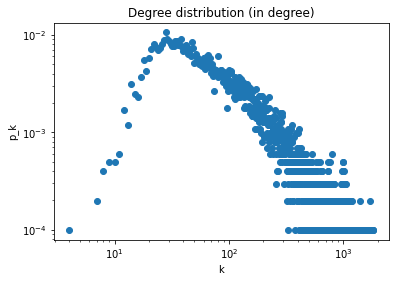

In [9]:
plot_degree_dist(G, mode='in')

Seems like a lot of bad content spread through hub bots 

## Degree of bots and humans

In [55]:
def hum_bot_degree(graph, deg_mode='in'):
    bots =[]
    humans = []
    for vertice in graph.vs:
        if vertice['bot']==0:
            humans += [graph.degree(vertice, mode=deg_mode, loops=False)]
        else:
            bots += [graph.degree(vertice, mode=deg_mode, loops=False)]
    return bots,humans

In [8]:
hub_expno='hubs_04'
hubnet = os.path.join(NETWORK_PATH, "network_%s.gml" %EXP_NETWORK[hub_expno])
G = ig.Graph.Read_GML(hubnet)
hub_bot_degs, human_degs= hum_bot_degree(G, deg_mode='in')

NameError: name 'hum_bot_degree' is not defined

Hub targeting

Text(0.5, 1.0, 'Degree distribution (gamma 0.1 beta 0.01)')

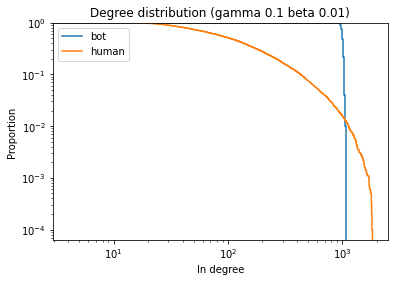

In [57]:
figure, ax= plt.subplots()

sns.ecdfplot(ax=ax, data = bot_degs, complementary=True, label = 'bot')
sns.ecdfplot(ax=ax, data = human_degs, complementary=True, label = 'human')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('In degree')
plt.title('Degree distribution (gamma 0.1 beta 0.01)')

In [61]:
hub_expno='none_04'
hubnet = os.path.join(NETWORK_PATH, "network_%s.gml" %EXP_NETWORK[hub_expno])
G = ig.Graph.Read_GML(hubnet)
nonehub_bot_degs, human_degs= hum_bot_degree(G, deg_mode='in')

Text(0.5, 1.0, 'Degree distribution of bot (gamma 0.1 beta 0.01)')

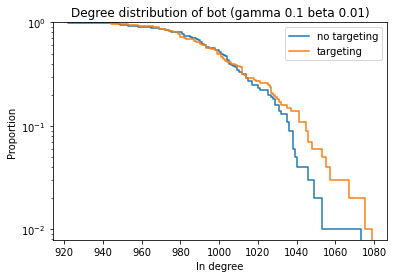

In [63]:
figure, ax= plt.subplots()

sns.ecdfplot(ax=ax, data = hub_bot_degs, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax, data = nonehub_bot_degs, complementary=True, label = 'targeting')
ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('In degree')
plt.title('Degree distribution of bot (gamma 0.1 beta 0.01)')

## Deg histogram of the network

In [8]:
EXP_NETWORK[hub_expno]

'18'

In [10]:
EXP_NETWORK[none_expno]

'08'

In [16]:
network = os.path.join(NETWORK_PATH, "network_%s.gml" %EXP_NETWORK[hub_expno])

In [17]:
G = ig.Graph.Read_GML(network)

In [32]:
human_agents = [int(node['id']) for node in G.vs if node['bot']==0]

In [33]:
human_agents[:3]

[0, 1, 2]

(array([7036., 1708.,  633.,  265.,  162.,  187.,   56.,   32.,   16.,
          11.]),
 array([   4. ,  186.9,  369.8,  552.7,  735.6,  918.5, 1101.4, 1284.3,
        1467.2, 1650.1, 1833. ]),
 <BarContainer object of 10 artists>)

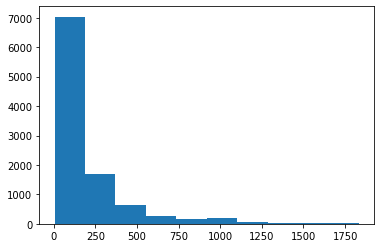

In [18]:
graph = G
vertices = range(len(graph.vs)) #vertices index
degs = graph.degree(vertices, mode='in', loops=False)
plt.hist(degs)

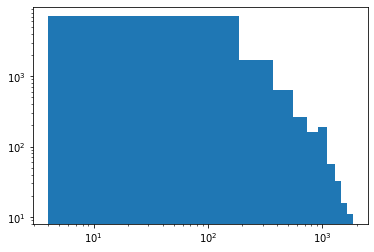

In [20]:
plt.hist(degs)
plt.xscale('log')
plt.yscale('log')

# Plot number of shares a meme gets vs the indeg of the spreading channel 
Let's say hubs are those with indeg>=15. 

## Bot memes

In [35]:
shares = [meme['human_shares'] + meme['bot_shares'] for meme in verbose['all_memes'] if meme['is_by_bot']==1]

In [17]:
shares=[]
avg_indegs = []
largest_indegs=[]
for meme in verbose['all_memes'][0]: #since verbose['all_memes'] is a list over multiple simulations
    if meme['is_by_bot']==1:
        shares+= [meme['human_shares'] + meme['bot_shares']]
        spread_through= [int(node) for node in meme['spread_via_agents']]
        indegs = graph.degree(spread_through, mode=mode, loops=False)
        avg_indegs += [np.mean(indegs)]
        largest_indegs += [max(indegs)]

Text(0, 0.5, 'shares')

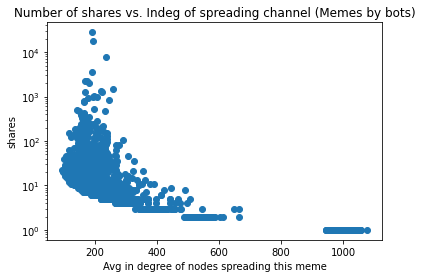

In [20]:
plt.scatter(avg_indegs, shares)
plt.title('Number of shares vs. Indeg of spreading channel (Memes by bots)')
plt.yscale('log')
plt.xlabel('Avg in degree of nodes spreading this meme')
plt.ylabel('shares')

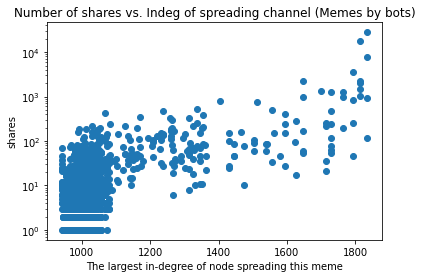

In [24]:
plt.scatter(largest_indegs, shares)
plt.title('Number of shares vs. Indeg of spreading channel (Memes by bots)')
plt.xlabel('The largest in-degree of node spreading this meme')
plt.ylabel('shares')
plt.yscale('log')

--> Seems like every meme goes through a hub

## Plot for hubs and no targeting

In [101]:
def numshares_vs_indeg(exp_no):
    mode='igraph'
    network = os.path.join(DATA_PATH, mode, 'vary_targetgamma', "network_%s.gml" %EXP_NETWORK[exp_no])
    fpath = os.path.join(TRACKING_DIR,'%s.json.gz' %exp_no)
    G = ig.Graph.Read_GML(network)
    verbose = utils.read_json_compressed(fpath)
    print('network: ', network)
    deg_mode='in'
    shares=[]
    avg_indegs = []
    largest_indegs=[]
    all_indegs = []
    print(verbose.keys())
    for meme in verbose['all_memes'][0]: #since verbose['all_memes'] is a list over multiple simulations
        if meme['is_by_bot']==1:
            shares+= [meme['human_shares'] + meme['bot_shares']]
            spread_through= [int(node) for node in meme['spread_via_agents']]
            indegs = G.degree(spread_through, mode=deg_mode, loops=False)
            all_indegs +=[indegs]
            avg_indegs += [np.mean(indegs)]
            largest_indegs += [max(indegs)]
    return shares, all_indegs, avg_indegs, largest_indegs

In [102]:
nohub = 'none_04'
hub = 'hubs_04'
shares, all_indegs, avg_indegs, largest_indegs = numshares_vs_indeg(nohub)
hubshares, huball_indegs, hubavg_indegs, hublargest_indegs = numshares_vs_indeg(hub)

network:  /N/slate/baotruon/marketplace/data/igraph/vary_targetgamma/network_08.gml
dict_keys(['targeting_criterion', 'theta', 'phi', 'verbose', 'human_network', 'beta', 'gamma', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_memes', 'all_feeds'])
network:  /N/slate/baotruon/marketplace/data/igraph/vary_targetgamma/network_18.gml
dict_keys(['targeting_criterion', 'theta', 'phi', 'verbose', 'human_network', 'beta', 'gamma', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_memes', 'all_feeds'])


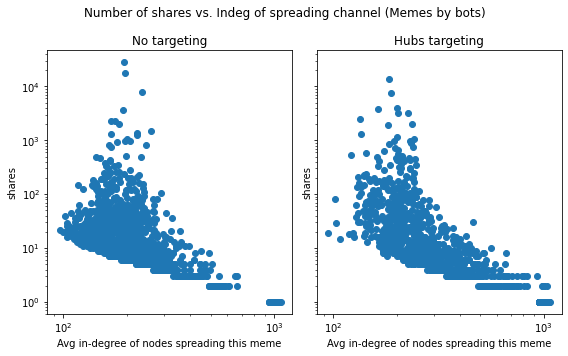

In [103]:
fig, (ax1,ax2)= plt.subplots(1,2, sharey=True, sharex=True, figsize=(8,5))
ax1.scatter(avg_indegs, shares)
ax1.set_title('No targeting')
ax1.set_xlabel('Avg in-degree of nodes spreading this meme')
ax1.set_ylabel('shares')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.scatter(hubavg_indegs, hubshares)
ax2.set_title('Hubs targeting')
ax2.set_xlabel('Avg in-degree of nodes spreading this meme')
ax2.set_ylabel('shares')

fig.suptitle('Number of shares vs. Indeg of spreading channel (Memes by bots)')
fig.tight_layout()

In [41]:
# fig, ax= plt.subplots()
# ax.hist(all_indegs, label='no targeting')
# ax.hist(hubindegs, label='hubs targeting')
# plt.legend()
# plt.xlabel('in-degree of spreading channels')
# plt.ylabel('freq')
# plt.title('Distribution of in-degree of spreading channels (memes by bots)')

In [44]:
common_node = verbose['all_memes'][0][0]['spread_via_agents']
print(common_node)
for idx, meme in enumerate(verbose['all_memes'][0][1:]):
    common_node = set(meme['spread_via_agents']) & set(common_node)
print(common_node)

[6312]
set()


--> They don't go through the same nodes, but nodes with same indeg

# CCDF: hubness of spreading nodes 
Probability of an agent sharing memes from hub (across simulation)

In [65]:
def prob_spreading_throughhub(G, verbose):
    # Stat final state
    # Helper  ccdf_final_spreadingnodes
    final_info = collections.defaultdict(lambda:[])
    deg_mode='in'

    human_agents = [int(node['id']) for node in G.vs if node['bot']==0]

    for agentid, memeids in verbose['all_feeds'][0].items():
        if any(map(str.isalpha, agentid)) is True:
            #skip bots
            continue
        
        memeinfo = (meme for meme in verbose['all_memes'][0] if meme['id'] in memeids)
        # verbose_memes = [meme for meme in verbose['all_memes'][0] if meme['id'] in memeids]
        for meme in memeinfo:
#             print('%s - %s' %(idx,i))
#             meme = next(memeinfo)
            spread_through= [int(node) for node in meme['spread_via_agents']]
            human_channels = set(human_agents) & set(spread_through)

            if len(human_channels)>0:
                indegs = G.degree(list(human_channels), mode=deg_mode, loops=False)
                largest_indeg = max(indegs)

                if meme['is_by_bot']==1:
                    final_info['botmeme_spread'] += [largest_indeg]
                    final_info['botmeme_shares'] += [meme['human_shares']]
                else:
                    final_info['humanmeme_spread'] += [largest_indeg]
                    final_info['humanmeme_shares'] += [meme['human_shares']]
    return final_info

In [6]:
exp_no='hubs_04'
network = os.path.join(DATA_PATH, 'igraph', 'vary_targetgamma', "network_%s.gml" %EXP_NETWORK[exp_no])
fpath = os.path.join(TRACKING_DIR,'%s.json.gz' %exp_no)
G = ig.Graph.Read_GML(network)
verbose = utils.read_json_compressed(fpath)

In [ ]:
verbose['all_feeds'][0]

In [13]:
verbose['all_memes'][0][0]

{'id': 1,
 'is_by_bot': 0.0,
 'phi': 5,
 'quality': 0.10036026657504726,
 'fitness': 0.10036026657504726,
 'human_shares': 1,
 'bot_shares': 0,
 'spread_via_agents': [6426],
 'qual_th': 165633,
 'share_th': 157337}

In [66]:
final_info = prob_spreading_throughhub(G, verbose)

KeyboardInterrupt: 

In [14]:
verbose['all_memes'][0]

[{'id': 1,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.10036026657504726,
  'fitness': 0.10036026657504726,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [6426],
  'qual_th': 165633,
  'share_th': 157337},
 {'id': 2,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.08848575340757081,
  'fitness': 0.08848575340757081,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [2768],
  'qual_th': 150471,
  'share_th': 143608},
 {'id': 3,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.05827939751698852,
  'fitness': 0.05827939751698852,
  'human_shares': 3,
  'bot_shares': 0,
  'spread_via_agents': [4701, 38, 8444],
  'qual_th': 107654,
  'share_th': 333629},
 {'id': 4,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.07161049442233458,
  'fitness': 0.07161049442233458,
  'human_shares': 2,
  'bot_shares': 0,
  'spread_via_agents': [825, 5755],
  'qual_th': 127432,
  'share_th': 311825},
 {'id': 5,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.06066316797887317,
  'f

In [48]:
a =(item for item in verbose['all_memes'][0] if item['id'] in [3,4,6])

In [49]:
type(a)

generator

In [50]:
items = []

In [51]:
for i in [3,4,6]:
    items+=[next(a)]
    print(i)

3
4
6


In [52]:
items

[{'id': 3,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.05827939751698852,
  'fitness': 0.05827939751698852,
  'human_shares': 3,
  'bot_shares': 0,
  'spread_via_agents': [4701, 38, 8444],
  'qual_th': 107654,
  'share_th': 333629},
 {'id': 4,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.07161049442233458,
  'fitness': 0.07161049442233458,
  'human_shares': 2,
  'bot_shares': 0,
  'spread_via_agents': [825, 5755],
  'qual_th': 127432,
  'share_th': 311825},
 {'id': 6,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.2514139061236941,
  'fitness': 0.2514139061236941,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [8752],
  'qual_th': 288023,
  'share_th': 262306}]

In [43]:
def indeg_spreading_channels(exp_no):
    mode='igraph'
    network = os.path.join(DATA_PATH, mode, 'vary_targetgamma', "network_%s.gml" %EXP_NETWORK[exp_no])
    fpath = os.path.join(TRACKING_DIR,'%s.json.gz' %exp_no)
    G = ig.Graph.Read_GML(network)
    verbose = utils.read_json_compressed(fpath)
#     print('network: ', network)
    deg_mode='in'
    
    human_agents = [int(node['id']) for node in G.vs if node['bot']==0]
    human_spread_only_viabot= 0
    bot_spread_only_viabot= 0
    humans = 0
    bots=0
    bot_largest_spreading_nodes = []
    human_largest_spreading_nodes = []
    for meme in verbose['all_memes'][0]: #since verbose['all_memes'] is a list over multiple simulations
        spread_through = [int(node) for node in meme['spread_via_agents']]
        human_channels = set(human_agents) & set(spread_through)
        if len(human_channels)>0:
            indegs = G.degree(list(human_channels), mode=deg_mode, loops=False)
            largest_indeg = max(indegs)
            if meme['is_by_bot']==1:
                bots+=1
                bot_largest_spreading_nodes += [largest_indeg]  
            else:
                humans+=1
                human_largest_spreading_nodes += [largest_indeg]
        else:
            if meme['is_by_bot']==1:
                bot_spread_only_viabot+=1
            else:
                human_spread_only_viabot+=1
            
    print('%s human meme, %s%% spread only through bots' %(humans, np.round(human_spread_only_viabot/humans, 2)))
    print('%s bot meme, %s%% spread only through bots' %(bots, np.round(bot_spread_only_viabot/bots, 2)))
    return bot_largest_spreading_nodes, human_largest_spreading_nodes

In [44]:
nohub = 'none_04'
hub = 'hubs_04'
bot_spread, human_spread= indeg_spreading_channels(nohub)
hubs_bot_spread, hubs_human_spread= indeg_spreading_channels(hub)

190536 human meme, 0.0% spread only through bots
710 bot meme, 1.7% spread only through bots
345565 human meme, 0.0% spread only through bots
859 bot meme, 3.01% spread only through bots


Text(0.5, 0.98, 'CCDF: Largest in-deg of spreading nodes (across whole simulation)')

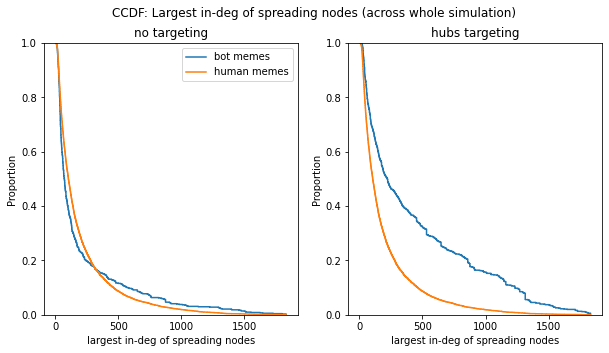

In [45]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.ecdfplot(ax=ax1, data = bot_spread, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = human_spread, complementary=True, label = 'human memes')
ax1.legend()
# ax1.set_xscale('log')

sns.ecdfplot(ax=ax2, data = hubs_bot_spread, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = hubs_human_spread, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('largest in-deg of spreading nodes')
ax2.set_xlabel('largest in-deg of spreading nodes')

figure.suptitle('CCDF: Largest in-deg of spreading nodes (across whole simulation)')
# ax.set_xlim([0, 1])

Text(0.5, 0.98, 'CCDF: Largest in-deg of spreading nodes (across whole simulation)')

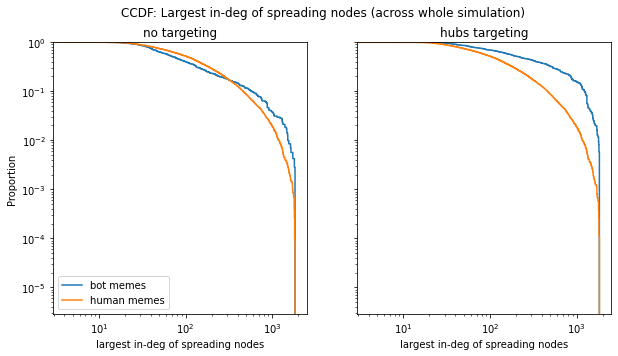

In [47]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)

sns.ecdfplot(ax=ax1, data = bot_spread, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = human_spread, complementary=True, label = 'human memes')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
sns.ecdfplot(ax=ax2, data = hubs_bot_spread, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = hubs_human_spread, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('largest in-deg of spreading nodes')
ax2.set_xlabel('largest in-deg of spreading nodes')

figure.suptitle('CCDF: Largest in-deg of spreading nodes (across whole simulation)')
# ax.set_xlim([0, 1])

Text(0.5, 0.98, 'CCDF: Largest in-deg of spreading nodes (across whole simulation)')

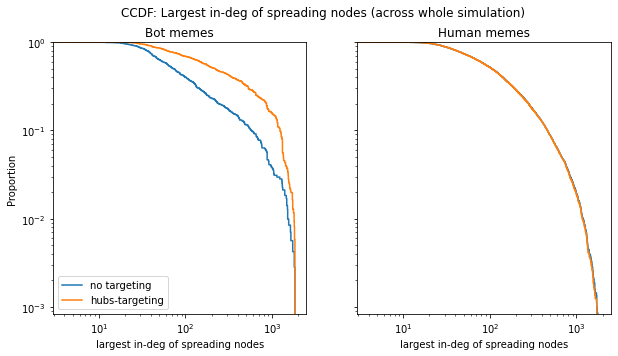

In [48]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)

sns.ecdfplot(ax=ax1, data = bot_spread, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax1, data = hubs_bot_spread, complementary=True, label = 'hubs-targeting')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
sns.ecdfplot(ax=ax2, data = human_spread, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax2, data = hubs_human_spread, complementary=True, label = 'hubs-targeting')

ax1.set_title('Bot memes')
ax2.set_title('Human memes')
ax1.set_xlabel('largest in-deg of spreading nodes')
ax2.set_xlabel('largest in-deg of spreading nodes')

figure.suptitle('CCDF: Largest in-deg of spreading nodes (across whole simulation)')
# ax.set_xlim([0, 1])

# Separate between hub nodes and non-hub nodes 

In [68]:
def get_exp_network_map(config_fname):
    exp_configs = json.load(open(config_fname,'r'))
    EXPS = list(exp_configs['vary_thetaphi'].keys()) #keys are name of exp, format: '{targeting}_{thetaidx}{phiidx}' 

    # map available network in `vary_targetgamma` corresponding with the exp
    # networks from `vary_targetgamma` has format: '{targeting}{gamma}'
    GAMMA = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.02, 0.05, 0.1, 0.2, 0.5]
    TARGETING = [None, 'hubs', 'partisanship', 'conservative', 'liberal', 'misinformation']

    EXP_NETWORK = {}

    gamma = 0.1 # gamma in the range where targeting has some effect
    # need to match with default_targeting
    for exp in EXPS:
        if 'none' in exp:
            networkname = '%s%s' %(TARGETING.index(None), GAMMA.index(gamma))
        else: 
            networkname = '%s%s' %(TARGETING.index(exp.split('_')[0]), GAMMA.index(gamma) )
        EXP_NETWORK[exp] = networkname

    return EXP_NETWORK

In [71]:
def meme_shares_channel_indegs(G, verbose, deg_mode='in'):
    # Helper: Scatter plot of number of shares vs indeg of spreading channel (for junk memes)
    # return a dict of information to calculate: 
    # % of memes spread only by bot; num shares, indeg of nodes spreading each meme

    info = collections.defaultdict(lambda:[])
    keys= ['num_humans', 'num_bots', 'human_spread_only_viabot', 'bot_spread_only_viabot']
    for k in keys:
        info[k] = 0

    human_agents = [int(node['id']) for node in G.vs if node['bot']==0]

    for meme in verbose['all_memes'][0]: #since verbose['all_memes'] is a list over multiple simulations
        spread_through = [int(node) for node in meme['spread_via_agents']]
        human_channels = set(human_agents) & set(spread_through)

        if len(human_channels)>0:
            indegs = G.degree(list(human_channels), mode=deg_mode, loops=False)
            largest_indeg = max(indegs)
            if meme['is_by_bot']==1:
                info['num_bots']+=1
                info['bot_largest_spreading_nodes'] += [largest_indeg]  
                info['botmeme_shares'] += [meme['human_shares']]
            else:
                info['num_humans']+=1
                info['human_largest_spreading_nodes'] += [largest_indeg]
                info['humanmeme_shares'] += [meme['human_shares']]
        else:
            if meme['is_by_bot']==1:
                info['bot_spread_only_viabot']+=1
            else:
                info['human_spread_only_viabot']+=1
        
    return info

In [72]:
# logger.info('WORKING DIR: %s' %(os.getcwd()))
ABS_PATH = '/N/slate/baotruon/marketplace'
DATA_PATH = '/N/slate/baotruon/marketplace/data'

config_fname= os.path.join(DATA_PATH, 'all_configs.json')
exp2network = get_exp_network_map(config_fname)

# CHANGE THESE VARS FOR OTHER INFILTRATION VALUES
exp = 'vary_thetaphi_1runs'
hub_expname='hubs_04'
none_expname='none_04'


RES_DIR = os.path.join(ABS_PATH,'results', exp)
TRACKING_DIR = os.path.join(ABS_PATH,'long_results',exp)
NETWORK_PATH = os.path.join(DATA_PATH, 'igraph/vary_targetgamma')
PLOT_DIR = os.path.join(ABS_PATH,'analysis_plots',exp)
utils.make_sure_dir_exists(PLOT_DIR, '')


hub_network = os.path.join(NETWORK_PATH, "network_%s.gml" %exp2network[hub_expname])
hub_verbose = utils.read_json_compressed(os.path.join(TRACKING_DIR,'%s.json.gz' %hub_expname))
hub_graph = ig.Graph.Read_GML(hub_network)

none_network = os.path.join(NETWORK_PATH, "network_%s.gml" %exp2network[none_expname])
none_verbose = utils.read_json_compressed(os.path.join(TRACKING_DIR,'%s.json.gz' %none_expname))
none_graph = ig.Graph.Read_GML(none_network)

hubstrag_info = meme_shares_channel_indegs(hub_graph, hub_verbose, deg_mode='in')
nostrag_info =  meme_shares_channel_indegs(none_graph, none_verbose, deg_mode='in')

In [78]:
hub_verbose.keys()

dict_keys(['targeting_criterion', 'theta', 'phi', 'verbose', 'human_network', 'beta', 'gamma', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_memes', 'all_feeds'])

In [82]:
x,y = (range(len(hub_verbose['quality_timestep'][0])), hub_verbose['quality_timestep'][0]))

ValueError: too many values to unpack (expected 2)

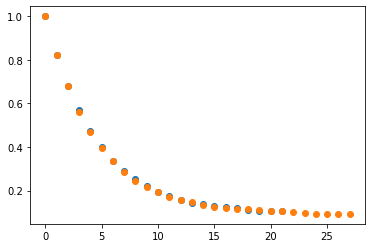

In [85]:

plt.scatter(range(len(hub_verbose['quality_timestep'][0])), hub_verbose['quality_timestep'][0], label='targeting')
plt.scatter(range(len(none_verbose['quality_timestep'][0])), none_verbose['quality_timestep'][0], label='no targeting')

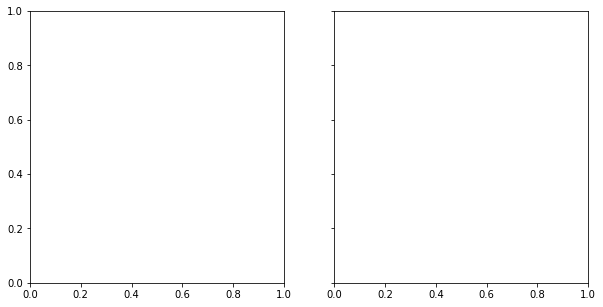

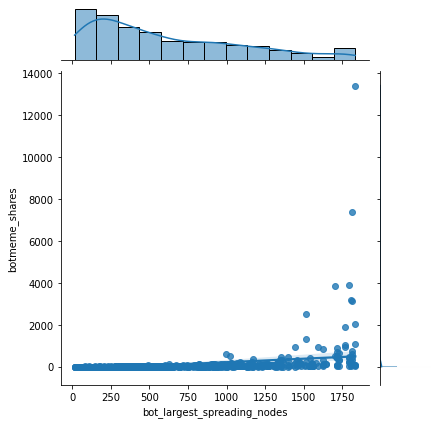

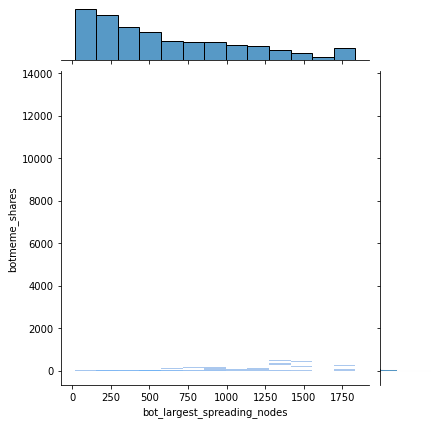

In [77]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)
sns.jointplot(data=hubstrag_info, ax=ax1, x='bot_largest_spreading_nodes', y='botmeme_shares', kind="reg")

sns.jointplot(data=hubstrag_info, ax=ax2, x='bot_largest_spreading_nodes', y='botmeme_shares', kind="hist")


In [14]:
a= {'b': (1,2), 'd':(3,4)}
def plus(x,y):
    return x+y

In [15]:
plus(*a['b'])

3

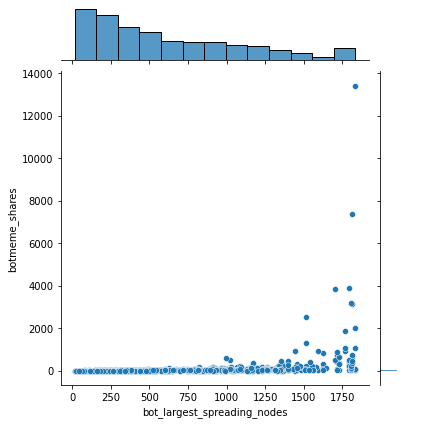

In [75]:

    g=sns.jointplot(data=hubstrag_info, x='bot_largest_spreading_nodes', y='botmeme_shares')
# g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')

In [76]:
g.show()

AttributeError: 'JointGrid' object has no attribute 'show'

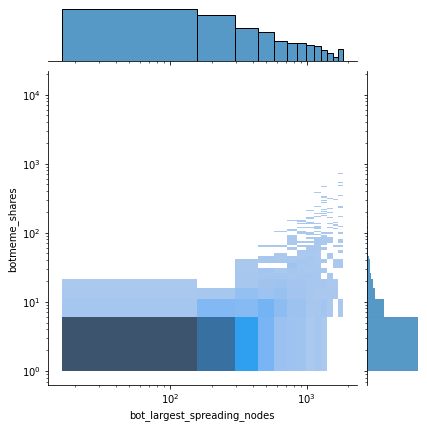

In [74]:
g=sns.jointplot(data=hubstrag_info, x='bot_largest_spreading_nodes', y='botmeme_shares', kind="hist")
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

In [109]:
x = hubstrag_info['bot_largest_spreading_nodes']
y = hubstrag_info['botmeme_shares']
hub_size=1000
hub_viahub = []
hub_not_viahub = []
for deg,share in zip(x,y):
    if deg>=hub_size:
        hub_viahub+=[share]
    else:
        hub_not_viahub +=[share]

Text(0.5, 0, 'shares')

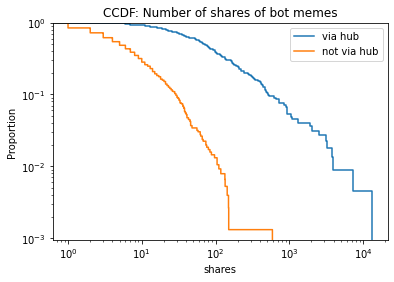

In [108]:
figure, ax = plt.subplots()

sns.ecdfplot(ax=ax, data = viahub, complementary=True, label = 'via hub')
sns.ecdfplot(ax=ax, data = not_viahub, complementary=True, label = 'not via hub')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('CCDF: Number of shares of bot memes')
ax.set_xlabel('shares')

In [110]:
x = nostrag_info['bot_largest_spreading_nodes']
y = nostrag_info['botmeme_shares']
hub_size=1000
viahub = []
not_viahub = []
for deg,share in zip(x,y):
    if deg>=hub_size:
        viahub+=[share]
    else:
        not_viahub +=[share]

Text(0.5, 0.98, 'CCDF: Number of shares of bot memes')

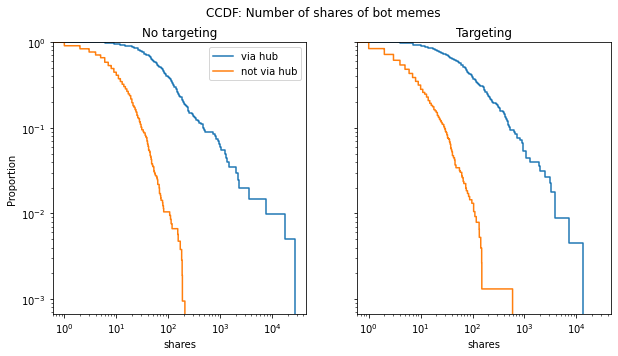

In [114]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)

sns.ecdfplot(ax=ax1, data = viahub, complementary=True, label = 'via hub')
sns.ecdfplot(ax=ax1, data = not_viahub, complementary=True, label = 'not via hub')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
sns.ecdfplot(ax=ax2, data = hub_viahub, complementary=True, label = 'via hub')
sns.ecdfplot(ax=ax2, data = hub_not_viahub, complementary=True, label = 'not via hub')

ax1.set_title('No targeting')
ax2.set_title('Targeting')
ax1.set_xlabel('shares')
ax2.set_xlabel('shares')

figure.suptitle('CCDF: Number of shares of bot memes')

In [115]:
!pwd

/geode2/home/u010/baotruon/Carbonate/marketplace/exps


In [122]:
a = []
isinstance(a,list)

True

In [119]:
figure.show()

In [117]:
figure.savefig('test_analyasis.png')

Text(0.5, 0.98, 'CCDF: Number of shares of bot memes')

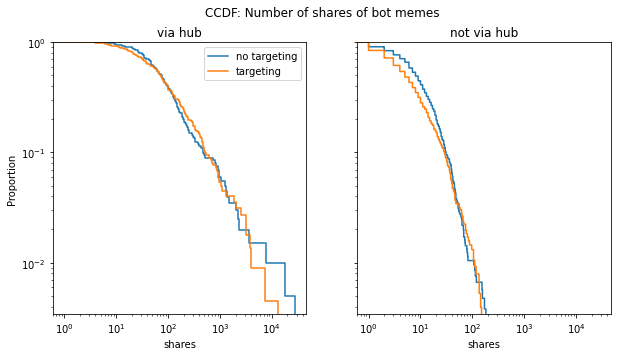

In [112]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)

sns.ecdfplot(ax=ax1, data = viahub, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax1, data = hub_viahub, complementary=True, label = 'targeting')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
sns.ecdfplot(ax=ax2, data = not_viahub, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax2, data = hub_not_viahub, complementary=True, label = 'targeting')

ax1.set_title('via hub')
ax2.set_title('not via hub')
ax1.set_xlabel('shares')
ax2.set_xlabel('shares')

figure.suptitle('CCDF: Number of shares of bot memes')

Text(0.5, 0, 'shares')

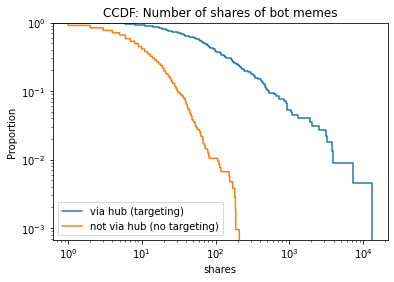

In [113]:
figure, ax = plt.subplots()

sns.ecdfplot(ax=ax, data = hub_viahub, complementary=True, label = 'via hub (targeting)')
sns.ecdfplot(ax=ax, data = not_viahub, complementary=True, label = 'not via hub (no targeting)')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('CCDF: Number of shares of bot memes')
ax.set_xlabel('shares')

In [ ]:
figure, ax = plt.subplots()

sns.ecdfplot(ax=ax, data = hub_not_viahub, complementary=True, label = 'via hub (targeting)')
sns.ecdfplot(ax=ax, data = not_viahub, complementary=True, label = 'not via hub (no targeting)')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('CCDF: Number of shares of bot memes')
ax.set_xlabel('shares')

## Human vs bot memes separated by hubs¶


In [104]:
def shares_separate_by_hubs(exp_no, hub_size=1000, allshare=True):
    mode='igraph'
    network = os.path.join(DATA_PATH, mode, 'vary_targetgamma', "network_%s.gml" %EXP_NETWORK[exp_no])
    fpath = os.path.join(TRACKING_DIR,'%s.json.gz' %exp_no)
    G = ig.Graph.Read_GML(network)
    verbose = utils.read_json_compressed(fpath)
    print('network: ', network)
    deg_mode='in'
    bot_hub_memeshare = []
    bot_nonehub_memeshare = []
    
    human_hub_memeshare = []
    human_nonehub_memeshare = []
    
    for meme in verbose['all_memes'][0]: #since verbose['all_memes'] is a list over multiple simulations
        spread_through= [int(node) for node in meme['spread_via_agents']]
        indegs = G.degree(spread_through, mode=deg_mode, loops=False)
        viahubs = [i for i in indegs if i>=hub_size]
        if allshare is True:
            shares = meme['human_shares'] + meme['bot_shares']
        else:
            shares = meme['human_shares']
                
        if meme['is_by_bot']==1: 
            if len(viahubs)>0:
                #meme went through at least 1 hub
                bot_hub_memeshare += [shares]
            else:
                bot_nonehub_memeshare += [shares]
        else:
            if len(viahubs)>0:
                #meme went through at least 1 hub
                human_hub_memeshare += [shares]
            else:
                human_nonehub_memeshare += [shares]
    return bot_hub_memeshare, bot_nonehub_memeshare, human_hub_memeshare, human_nonehub_memeshare

In [105]:
allshare=False
nohub = 'none_04'
hub = 'hubs_04'
bot_hub_memeshare1, bot_nonehub_memeshare1, human_hub_memeshare1, human_nonehub_memeshare1 = shares_separate_by_hubs(nohub, allshare=False)

network:  /N/slate/baotruon/marketplace/data/igraph/vary_targetgamma/network_08.gml


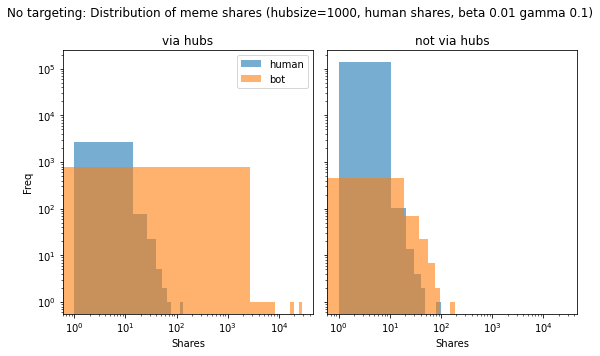

In [6]:
alpha=0.6
fig, (ax1,ax2)= plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,5))
ax1.hist(human_hub_memeshare, label='human', alpha=alpha)
ax1.hist(bot_hub_memeshare, label='bot', alpha=alpha)

ax1.legend()
ax1.set_xlabel('Shares')
ax1.set_ylabel('Freq')
ax1.set_title('via hubs')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.hist(human_nonehub_memeshare, label='human', alpha=alpha)
ax2.hist(bot_nonehub_memeshare, label='bot', alpha=alpha)

ax2.set_title('not via hubs')
ax2.set_xlabel('Shares')

fig.suptitle('No targeting: Distribution of meme shares (hubsize=1000, human shares, beta 0.01 gamma 0.1)')
fig.tight_layout()

Hub targeting

In [14]:
bot_hub_memeshare2, bot_nonehub_memeshare2, human_hub_memeshare2, human_nonehub_memeshare2 = shares_separate_by_hubs(hub, allshare=False)

network:  /N/slate/baotruon/marketplace/data/igraph/vary_targetgamma/network_18.gml


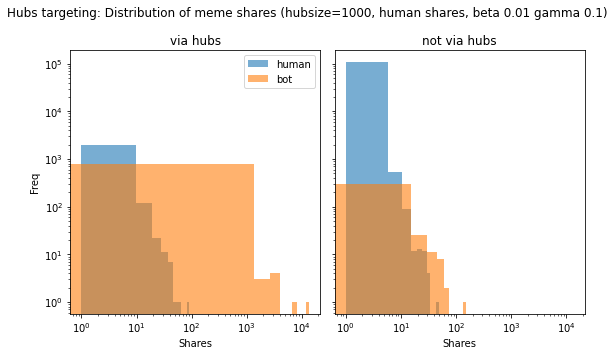

In [8]:
alpha=0.6
fig, (ax1,ax2)= plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,5))
ax1.hist(human_hub_memeshare, label='human', alpha=alpha)
ax1.hist(bot_hub_memeshare, label='bot', alpha=alpha)

ax1.legend()
ax1.set_xlabel('Shares')
ax1.set_ylabel('Freq')
ax1.set_title('via hubs')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.hist(human_nonehub_memeshare, label='human', alpha=alpha)
ax2.hist(bot_nonehub_memeshare, label='bot', alpha=alpha)

ax2.set_title('not via hubs')
ax2.set_xlabel('Shares')

fig.suptitle('Hubs targeting: Distribution of meme shares (hubsize=1000, human shares, beta 0.01 gamma 0.1)')
fig.tight_layout()

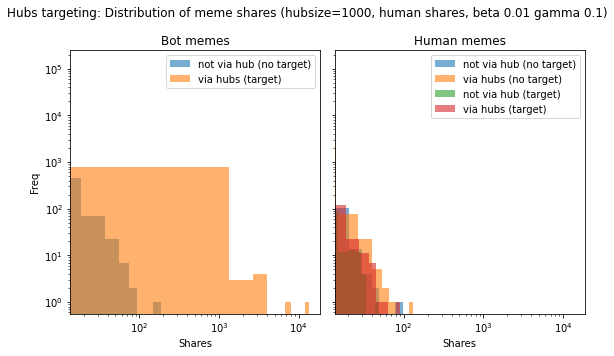

In [19]:
alpha=0.6
fig, (ax1,ax2)= plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,5))
ax1.hist(bot_nonehub_memeshare1, label='not via hub (no target)', alpha=alpha)
# ax1.hist(bot_hub_memeshare1, label='via hubs (no target)', alpha=alpha)
# ax1.hist(bot_nonehub_memeshare2, label='not via hub (target)', alpha=alpha)
ax1.hist(bot_hub_memeshare2, label='via hubs (target)', alpha=alpha)

ax1.legend()
ax1.set_xlabel('Shares')
ax1.set_ylabel('Freq')
ax1.set_title('Bot memes')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.hist(human_nonehub_memeshare1, label='not via hub (no target)', alpha=alpha)
ax2.hist(human_hub_memeshare1, label='via hubs (no target)', alpha=alpha)
ax2.hist(human_nonehub_memeshare2, label='not via hub (target)', alpha=alpha)
ax2.hist(human_hub_memeshare2, label='via hubs (target)', alpha=alpha)

ax2.set_title('Human memes')
ax2.set_xlabel('Shares')
ax2.legend()
fig.suptitle('Hubs targeting: Distribution of meme shares (hubsize=1000, human shares, beta 0.01 gamma 0.1)')
fig.tight_layout()

In [11]:
from scipy.stats import ks_2samp
ks_2samp(bot_nonehub_memeshare, bot_nonehub_memeshare)

KstestResult(statistic=0.0, pvalue=1.0)

# CCDF: hubness of spreading nodes 
Probability of an agent sharing memes from hub (final state)

In [10]:
def prob_spreading_throughhub(exp_no):
    mode='igraph'
    network = os.path.join(DATA_PATH, mode, 'vary_targetgamma', "network_%s.gml" %EXP_NETWORK[exp_no])
    fpath = os.path.join(TRACKING_DIR,'%s.json.gz' %exp_no)
    G = ig.Graph.Read_GML(network)
    verbose = utils.read_json_compressed(fpath)
    deg_mode='in'
    
    bot_memes = []
    human_memes = []
    # humans = [agent_id for agent_id in verbose['all_feeds'][0].keys() if any(map(str.isalpha, agent_id)) is False]
    for agentid, memeids in verbose['all_feeds'][0].items():
        if any(map(str.isalpha, agentid)) is True:
            #skip bots
            continue

        verbose_memes = [meme for meme in verbose['all_memes'][0] if meme['id'] in memeids]
        for meme in verbose_memes:
            spread_through= [int(node) for node in meme['spread_via_agents']]
            indegs = G.degree(spread_through, mode=deg_mode, loops=False)
            largest_indeg = max(indegs)
            if meme['is_by_bot']==1:
                bot_memes += [largest_indeg]
            else:
                human_memes += [largest_indeg]
    return bot_memes, human_memes

In [130]:
nohub = 'none_04'
bot_memes, human_memes = prob_spreading_throughhub(nohub)

In [11]:
import pickle as pkl

In [133]:
pkl.dump(bot_memes, open('%s_trackhubs_botmemes.pkl' %nohub, 'wb'))
pkl.dump(human_memes, open('%s_trackhubs_humanmemes.pkl' %nohub, 'wb'))

In [12]:
hub = 'hubs_04'
hubs_bot_memes, hubs_human_memes = prob_spreading_throughhub(hub)

In [13]:
pkl.dump(hubs_bot_memes, open('%s_trackhubs_botmemes.pkl' %hub, 'wb'))
pkl.dump(hubs_human_memes, open('%s_trackhubs_humanmemes.pkl' %hub, 'wb'))

## Data saved, run from here

In [14]:
nohub = 'none_04'
hub = 'hubs_04'
bot_memes = pkl.load(open('%s_trackhubs_botmemes.pkl' %nohub, 'rb'))
human_memes = pkl.load(open('%s_trackhubs_humanmemes.pkl' %nohub, 'rb'))

# hubs_bot_memes = pkl.load(open('%s_trackhubs_botmemes.pkl' %hub, 'rb'))
# hubs_human_memes = pkl.load(open('%s_trackhubs_humanmemes.pkl' %hub, 'rb'))

In [16]:
import seaborn as sns

Text(0.5, 0.98, 'CCDF: Largest in-deg of spreading nodes (final state)')

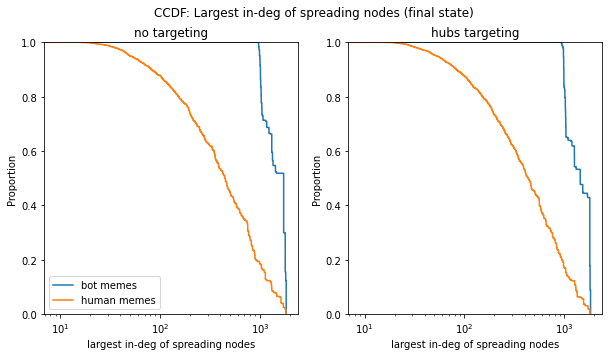

In [19]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.ecdfplot(ax=ax1, data = bot_memes, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = human_memes, complementary=True, label = 'human memes')
ax1.legend()
ax1.set_xscale('log')

sns.ecdfplot(ax=ax2, data = hubs_bot_memes, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = hubs_human_memes, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('largest in-deg of spreading nodes')
ax2.set_xlabel('largest in-deg of spreading nodes')

figure.suptitle('CCDF: Largest in-deg of spreading nodes (final state)')
# ax.set_xlim([0, 1])